In [3]:
import pandas as pd
%pylab inline

import liurp_fields

Populating the interactive namespace from numpy and matplotlib


# 2013 LIURP Data Import

In [4]:
# LIURP File Import
colspecs = liurp_fields.colspecs
colnames = liurp_fields.colnames
liurp_2013 = pd.read_fwf("CY2013/PGWLIURP2013.txt", colspecs=colspecs, header=None, names=colnames)
liurp_2013.head()

,COMPANY,YEAR,CUSTNUM,ZIPCODE,COUNTY,MCD,SERTYPEB,CLASS,PREUSE1,PREUSE2,...,TOTBFR,TOTDCA,TOTOTHR,TERMPRE,BLANK,TERMPOS,PAYPRE,PAYPOST,PILOT,CONTRACT
0,76,2013,10061416,19141,101,5,1,1,37,68,...,M,M,M,NaN,M,M,M,M,4,1
1,76,2013,100840244,19119,101,5,1,1,94,26,...,M,M,M,NaN,M,M,489,1165,4,4
2,76,2013,100974493,19140,101,5,1,1,6,9,...,M,M,M,NaN,M,M,1513,1470,4,3
3,76,2013,101307042,19121,101,5,1,1,218,113,...,M,M,M,NaN,M,M,1452,1323,4,1
4,76,2013,102147829,19139,101,5,1,1,93,26,...,M,M,M,NaN,M,M,655,845,4,4


In [6]:
# remove cases with missing usage and calculate the savings
ldf2013 = liurp_2013[liurp_2013.ADJPRE != 'M']
ldf2013.ADJPRE = ldf2013.ADJPRE.map(float)
ldf2013.ADJPOST = ldf2013.ADJPOST.map(float)
ldf2013['SAVE'] = ldf2013.ADJPRE - ldf2013.ADJPOST

print 'All cases:', len(liurp_2013)
print 'With save:', len(ldf2013)

All cases: 2395
With save: 2019


//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1858: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  self[name] = value


# 2012 LIURP Data Import

In [5]:
# LIURP File Import
colspecs = liurp_fields.colspecs
colnames = liurp_fields.colnames
liurp_2012 = pd.read_fwf("CY2012/PGWLIURP2012.txt", colspecs=colspecs, header=None, names=colnames)
liurp_2012.head()

,COMPANY,YEAR,CUSTNUM,ZIPCODE,COUNTY,MCD,SERTYPEB,CLASS,PREUSE1,PREUSE2,...,TOTBFR,TOTDCA,TOTOTHR,TERMPRE,BLANK,TERMPOS,PAYPRE,PAYPOST,PILOT,CONTRACT
0,76,2012,100073509,19121,101,5,1,1,320,230,...,M,M,M,NaN,M,M,384,345,4,004
1,76,2012,100318737,19145,101,5,1,1,10,46,...,M,M,M,NaN,M,M,M,M,4,001
2,76,2012,100356954,19131,101,5,1,1,12,25,...,M,M,M,NaN,M,M,1408,1267,4,001
3,76,2012,100753007,19126,101,5,1,1,M,M,...,M,M,M,NaN,M,M,M,M,4,003
4,76,2012,100870997,19132,101,5,1,1,340,266,...,M,M,M,NaN,M,M,M,M,4,003


In [135]:
# remove cases with missing usage and calculate the savings
ldf2012 = liurp_2012[liurp_2012.ADJPRE != 'M']
ldf2012.ADJPRE = ldf2012.ADJPRE.map(float)
ldf2012.ADJPOST = ldf2012.ADJPOST.map(float)
ldf2012['SAVE'] = ldf2012.ADJPRE - ldf2012.ADJPOST

ldf2013['COSTCCF'] = ldf2013.SUMCOST / ldf2013.SAVE
ldf2012.SUMCOST = ldf2012.SUMCOST.map(int)
ldf2012['COSTCCF'] = ldf2012.SUMCOST / ldf2012.SAVE

print 'All cases:', len(liurp_2012)
print 'With save:', len(ldf2012)

All cases: 2157
With save: 1535


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


# ELIRP CASE INFO

In [8]:
# Import ELIRP data
elirp = pd.read_excel("CY2013/All ELIRP cases for LIURP eval.xlsx")

# get the closed cases and closed year
closed_cases = elirp[(elirp.Status == 'Closed') | (elirp.Status == "Closed: Limited Only")]
closed_cases['yr'] = closed_cases['Closed Date'].apply(lambda x: int(str(x)[0:4]))

# MERGE CASE INFO WITH LIURP DATA

In [136]:
# 2012 data
ldf2012.CUSTNUM = ldf2012.CUSTNUM.map(int)
print "2012 PRE: ", len(ldf2012)
ldf2012c = pd.merge(ldf2012, closed_cases[closed_cases.yr == 2012], 
              how='inner', left_on=['CUSTNUM'], right_on=['Customer Acct No'])
print "2012 POST:", len(ldf2012c)

2012 PRE:  1535
2012 POST: 1442


In [137]:
# 2013 data
ldf2013.CUSTNUM = ldf2013.CUSTNUM.map(int)
print "2013 PRE: ", len(ldf2013)
ldf2013c = pd.merge(ldf2013, closed_cases[closed_cases.yr == 2013], 
              how='inner', left_on=['CUSTNUM'], right_on=['Customer Acct No'])
print "2013 POST:", len(ldf2013c)

2013 PRE:  2019
2013 POST: 2012


# SAVINGS HISTOGRAMS

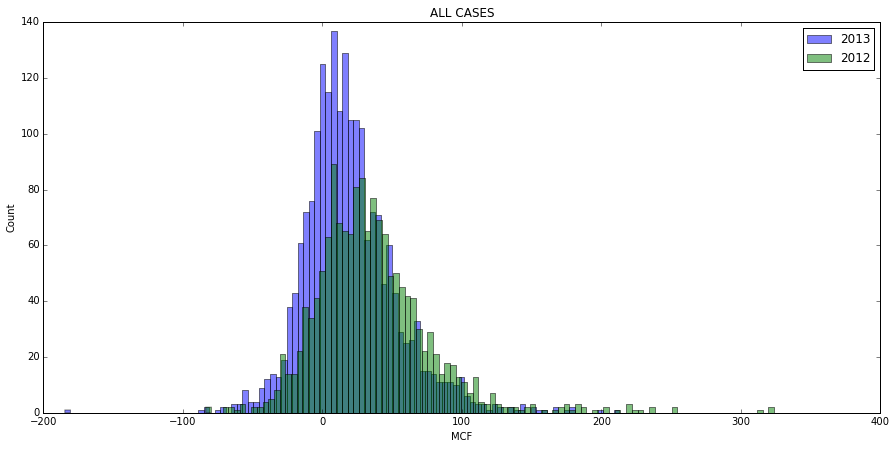

In [85]:
# all cases
plt.figure(figsize=(15,7))
plt.hist(ldf2013.SAVE/10, bins=100, label='2013', alpha=0.5)
plt.hist(ldf2012.SAVE/10, bins=100, label='2012', alpha=0.5)
plt.legend(loc='upper right')
plt.title('ALL CASES')
plt.xlabel('MCF')
plt.ylabel('Count')
plt.show()

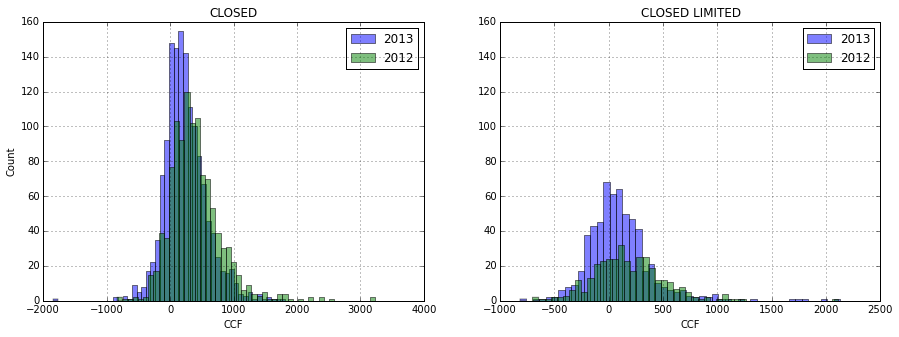

In [86]:
# closed vs. closed limited
plt.figure(figsize=(15,5))

plt.subplot(121)
ldf2013c[ldf2013c.Status == 'Closed'].SAVE.hist(alpha=0.5, bins=50, label='2013')
ldf2012c[ldf2012c.Status == 'Closed'].SAVE.hist(alpha=0.5, bins=50, label='2012')
plt.legend(loc='upper right')
plt.title('CLOSED')
plt.xlabel('CCF')
plt.ylabel('Count')

plt.subplot(122)
ldf2013c[ldf2013c.Status == 'Closed: Limited Only'].SAVE.hist(alpha=0.5, bins=50, label='2013')
ldf2012c[ldf2012c.Status == 'Closed: Limited Only'].SAVE.hist(alpha=0.5, bins=50, label='2012')
plt.legend(loc='upper right')
plt.title('CLOSED LIMITED')
plt.xlabel('CCF')
plt.gca().set_ylim([0,160])

plt.show()

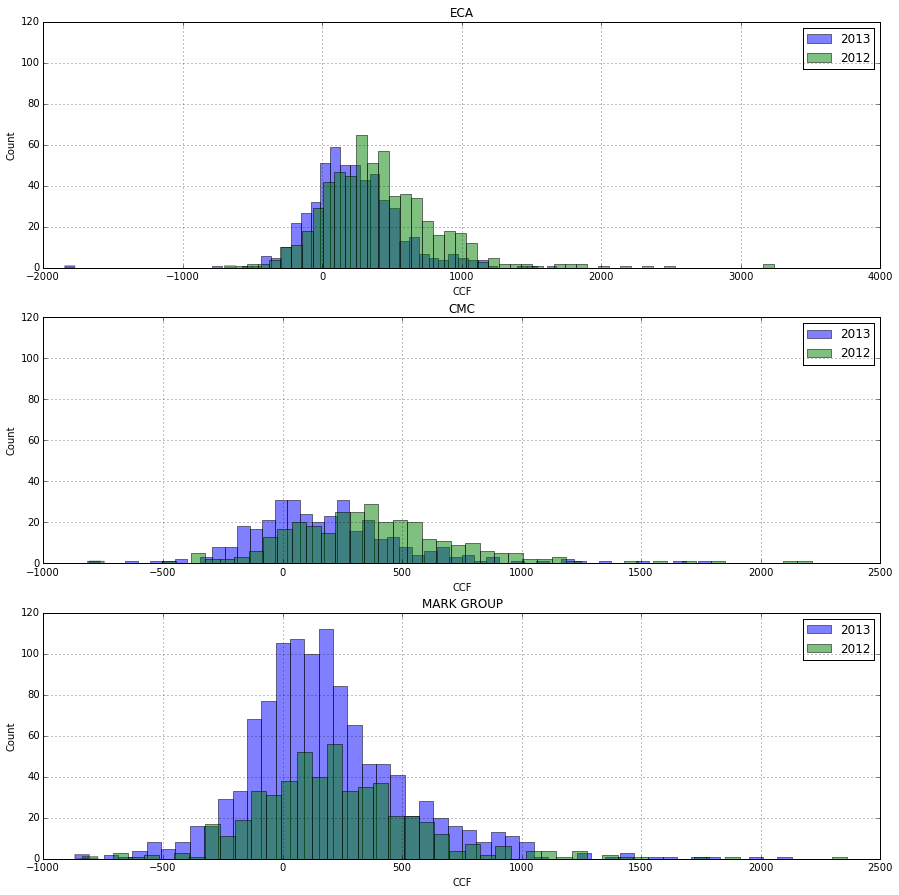

In [87]:
# closed vs. closed limited
plt.figure(figsize=(15,15))

plt.subplot(311)
ldf2013c[ldf2013c.Contractor == 'ECA'].SAVE.hist(alpha=0.5, bins=50, label='2013')
ldf2012c[ldf2012c.Contractor == 'ECA'].SAVE.hist(alpha=0.5, bins=50, label='2012')
plt.legend(loc='upper right')
plt.title('ECA')
plt.xlabel('CCF')
plt.ylabel('Count')
plt.gca().set_ylim([0,120])

plt.subplot(312)
ldf2013c[ldf2013c.Contractor == 'CMC'].SAVE.hist(alpha=0.5, bins=50, label='2013')
ldf2012c[ldf2012c.Contractor == 'CMC'].SAVE.hist(alpha=0.5, bins=50, label='2012')
plt.legend(loc='upper right')
plt.title('CMC')
plt.xlabel('CCF')
plt.ylabel('Count')
plt.gca().set_ylim([0,120])

plt.subplot(313)
ldf2013c[ldf2013c.Contractor == 'MARKGROUP'].SAVE.hist(alpha=0.5, bins=50, label='2013')
ldf2012c[ldf2012c.Contractor == 'MARKGROUP'].SAVE.hist(alpha=0.5, bins=50, label='2012')
plt.legend(loc='upper right')
plt.title('MARK GROUP')
plt.xlabel('CCF')
plt.ylabel('Count')

plt.show()

# PRE/POST USAGE

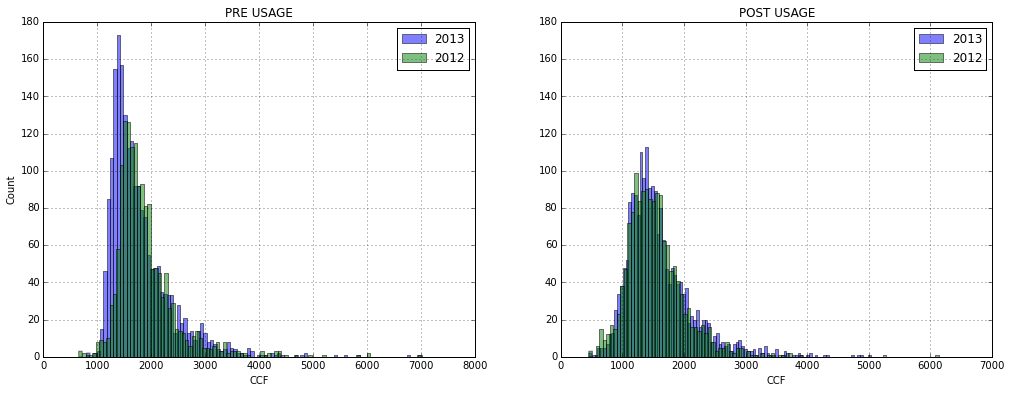

In [91]:
# closed vs. closed limited
plt.figure(figsize=(17,6))

plt.subplot(121)
ldf2013.ADJPRE.hist(alpha=0.5, bins=100, label='2013')
ldf2012.ADJPRE.hist(alpha=0.5, bins=100, label='2012')
plt.legend(loc='upper right')
plt.title('PRE USAGE')
plt.xlabel('CCF')
plt.ylabel('Count')

plt.subplot(122)
ldf2013.ADJPOST.hist(alpha=0.5, bins=100, label='2013')
ldf2012.ADJPOST.hist(alpha=0.5, bins=100, label='2012')
plt.legend(loc='upper right')
plt.title('POST USAGE')
plt.xlabel('CCF')
plt.gca().set_ylim([0,180])

plt.show()

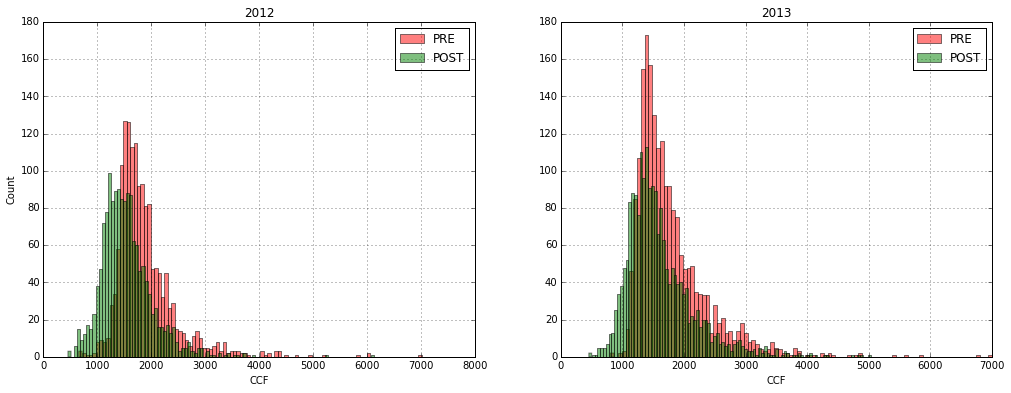

In [97]:
# closed vs. closed limited
plt.figure(figsize=(17,6))

plt.subplot(121)
ldf2012.ADJPRE.hist(alpha=0.5, bins=100, label='PRE', color='r')
ldf2012.ADJPOST.hist(alpha=0.5, bins=100, label='POST', color='g')
plt.legend(loc='upper right')
plt.title('2012')
plt.xlabel('CCF')
plt.ylabel('Count')
plt.gca().set_ylim([0,180])

plt.subplot(122)
ldf2013.ADJPRE.hist(alpha=0.5, bins=100, label='PRE', color='r')
ldf2013.ADJPOST.hist(alpha=0.5, bins=100, label='POST', color='g')
plt.legend(loc='upper right')
plt.title('2013')
plt.xlabel('CCF')
plt.gca().set_ylim([0,180])

plt.show()

# Job Costs

2012
====


,SAVE,SUMCOST,COSTCCF,ADJPRE,ADJPOST
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,353.425668,3087.591531,inf,1884.787948,1531.362280
std,427.674666,2760.474234,NaN,576.473255,482.287213
min,-836.900000,15.000000,-5545.833333,654.200000,454.700000
25%,85.000000,747.500000,1.173966,1539.300000,1220.500000
50%,299.300000,2228.000000,5.888817,1754.600000,1462.800000
75%,543.000000,5098.500000,12.148571,2063.400000,1751.600000
max,3236.100000,9999.000000,inf,7016.800000,6135.900000


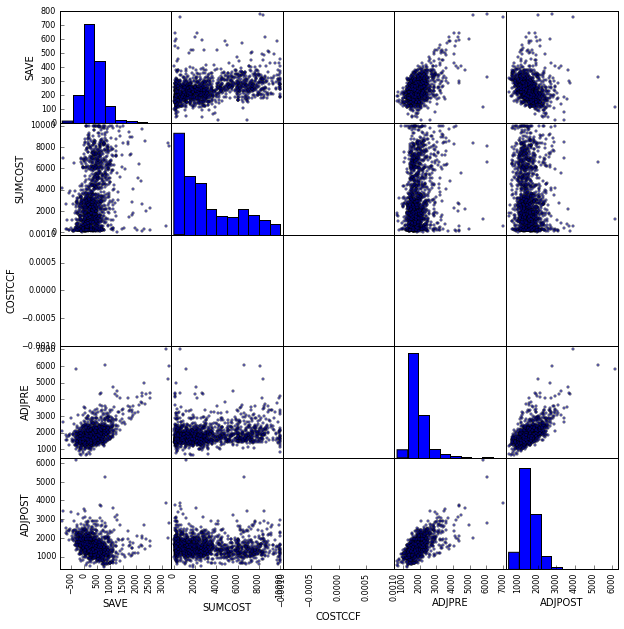

In [138]:
cols = ['SAVE', 'SUMCOST', 'COSTCCF', 'ADJPRE', 'ADJPOST']

print '2012'
print '===='
pd.scatter_matrix(ldf2012[cols], figsize=(10,10))
ldf2012[cols].describe()

2013
====


,SAVE,SUMCOST,COSTCCF,ADJPRE,ADJPOST
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,193.296880,2348.054482,20.843051,1788.417831,1595.120951
std,335.832817,2439.881714,715.410507,599.038634,556.556036
min,-1846.400000,58.000000,-8653.750000,802.000000,454.500000
25%,-10.350000,336.000000,-0.831205,1395.300000,1232.050000
50%,152.700000,1501.000000,4.332029,1619.900000,1468.100000
75%,356.100000,3174.500000,12.512650,1997.500000,1825.650000
max,2128.500000,9998.000000,30630.000000,6992.500000,5035.100000


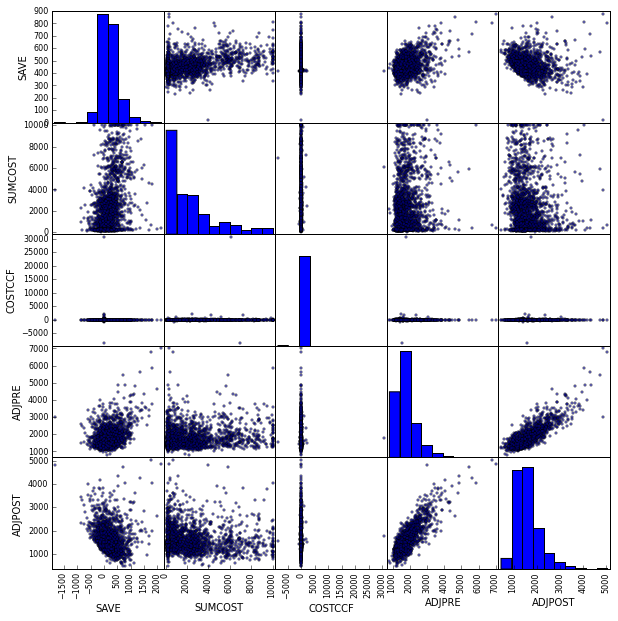

In [139]:
print '2013'
print '===='
pd.scatter_matrix(ldf2013[cols], figsize=(10,10))
ldf2013[cols].describe()

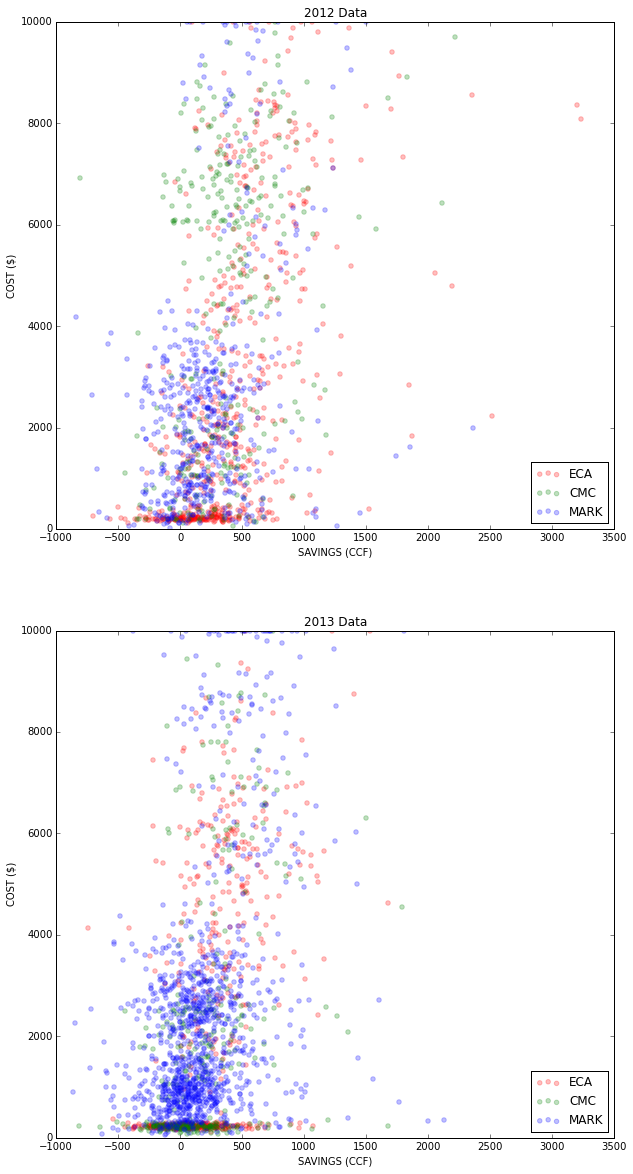

In [150]:
# show some contractor graphs
ldf2012ECA = ldf2012c[ldf2012c.Contractor == 'ECA']
ldf2012MARK = ldf2012c[ldf2012c.Contractor == 'MARKGROUP']
ldf2012CMC= ldf2012c[ldf2012c.Contractor == 'CMC']

ldf2013ECA = ldf2013c[ldf2013c.Contractor == 'ECA']
ldf2013MARK = ldf2013c[ldf2013c.Contractor == 'MARKGROUP']
ldf2013CMC = ldf2013c[ldf2013c.Contractor == 'CMC']
# plot save vs. cost
plt.figure(figsize=(10,20))

plt.subplot(211)
plt.scatter(ldf2012ECA.SAVE, ldf2012ECA.SUMCOST, alpha=0.25, label='ECA', color='r')
plt.scatter(ldf2012CMC.SAVE, ldf2012CMC.SUMCOST, alpha=0.25, label='CMC', color='g')
plt.scatter(ldf2012MARK.SAVE, ldf2012MARK.SUMCOST, alpha=0.25, label='MARK', color='b')
plt.legend(loc='lower right')
plt.title('2012 Data')
plt.xlabel('SAVINGS (CCF)')
plt.ylabel('COST ($)')
plt.gca().set_xlim([-1000, 3500])
plt.gca().set_ylim([0,10000])

plt.subplot(212)
plt.scatter(ldf2013ECA.SAVE, ldf2013ECA.SUMCOST, alpha=0.25, label='ECA', color='r')
plt.scatter(ldf2013CMC.SAVE, ldf2013CMC.SUMCOST, alpha=0.25, label='CMC', color='g')
plt.scatter(ldf2013MARK.SAVE, ldf2013MARK.SUMCOST, alpha=0.25, label='MARK', color='b')
plt.legend(loc='lower right')
plt.title('2013 Data')
plt.xlabel('SAVINGS (CCF)')
plt.ylabel('COST ($)')
plt.gca().set_xlim([-1000, 3500])
plt.gca().set_ylim([0,10000])

plt.show()